## Eigenvalues  Laplacian on [0,1]


$\nabla^2 u = \lambda u$



In [1]:
# add parent folder path where lib folder is
import sys

sys.path.insert(0, "..")
import pylsa
from pylsa.dmsuite import laplacian_fd2
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.sparse.linalg import eigs
from timeit import default_timer as timer

# Parameters
N = 200
length = 1.0

# Lhs Matrix
L = 1.0 * laplacian_fd2(N, length)


### Direct EVP Solver

Elapsed time  0.062437


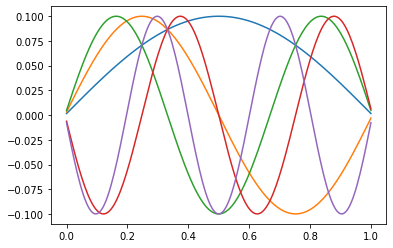

In [3]:

start = timer()
# Solve evp
eigvals, eigvecs = eig(L)
print("Elapsed time {:9.6f}".format(timer() - start))

# Sort
idx = np.abs(eigvals).argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Assert correctness
# <https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors_of_the_second_derivative>
for i in range(len(eigvals)):
    h = length / N
    eval_analytical = -4 / (h ** 2) * np.sin(np.pi * (i + 1) / (2 * (N + 1))) ** 2
    assert np.abs((eigvals[i] - eval_analytical)) < 1e-6

# Plot
fig, ax = plt.subplots()
for i in range(5):
    ax.plot(np.linspace(0, 1, N), np.real(eigvecs[:, i]))
plt.show()

## Iterative EVP Solver

Elapsed time  0.155509


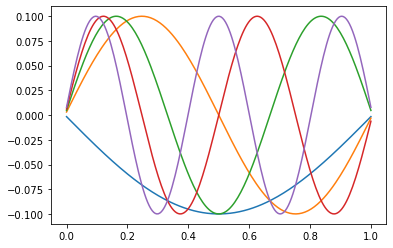

In [4]:
start = timer()
# Solve evp
eigvals, eigvecs = eigs(L, k=5, which="LR")
print("Elapsed time {:9.6f}".format(timer() - start))

# Sort
idx = np.abs(eigvals).argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Assert correctness
# <https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors_of_the_second_derivative>
for i in range(len(eigvals)):
    h = length / N
    eval_analytical = -4 / (h ** 2) * np.sin(np.pi * (i + 1) / (2 * (N + 1))) ** 2
    assert np.abs((eigvals[i] - eval_analytical)) < 1e-6

# Plot
fig, ax = plt.subplots()
for i in range(5):
    ax.plot(np.linspace(0, 1, N), np.real(eigvecs[:, i]))
plt.show()